<a href="https://colab.research.google.com/github/aerau05/ds3001proj/blob/main/ds3001Proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# loaded DEMO.xpt and linked_mortality_file_1999_2000.csv (both in the repo) into colab
# then just used provided code segment from assignment
import pandas as pd
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') # Load mortality file
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") # Load demographics file
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable

   SEQN  ELIGSTAT  MORTSTAT  UCOD_LEADING  DIABETES  HYPERTEN  PERMTH_INT  \
0     1         2       NaN           NaN       NaN       NaN         NaN   
1     2         1       1.0           6.0       0.0       0.0       177.0   
2     3         2       NaN           NaN       NaN       NaN         NaN   
3     4         2       NaN           NaN       NaN       NaN         NaN   
4     5         1       0.0           NaN       NaN       NaN       244.0   

   PERMTH_EXM  
0         NaN  
1       177.0  
2         NaN  
3         NaN  
4       244.0  
   SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDAGEEX  \
0   1.0       1.0       2.0       2.0       2.0       2.0      29.0      31.0   
1   2.0       1.0       2.0       2.0       1.0      77.0     926.0     926.0   
2   3.0       1.0       2.0       1.0       2.0      10.0     125.0     126.0   
3   4.0       1.0       2.0       2.0       1.0       1.0      22.0      23.0   
4   5.0       1.0       2.0       2.

ELIGSTAT indicates whether a NHANES particpant was eligible to be linked to the National Dealth Index for mortality follow-up. Individuals who are classified as eligible have suffiecient identifying information (like name, birth date, and SSN) to allow accurate matching to death records. Participants who are ineligilbe and cannot be reliably followed for mortality outcomes and therefore are excluded from certain analses. This variable is important because only eligible can be used to study survival and death outcomes.

The MORSTAT variable represensts the participants mortalitiy status at the end of the follow-up period. It is a binary variable indicating whether the individual was alive or deceased. A value of 0 typicall means the participant was alive at the end of the follow-up, while a value of 1 indicates that the participant had died. This variable serves as the primary outcome variable for predicting mortality and is central to analyses that attempt to model clear or classify death risk using demographic, behavioral, and health data.

PERMTH_INT measures the total number of months each participant was followed from the date of their NHANES examination until either death or the end of the mortality follow-up period. This variable provides a measrue of survival time and can be interpreted as the length of time a person remained alive after being surveyed. It is useful for studying life expectancy and time-to-event outcomes and allows researchers to model not only whether someone died, but how long they survived.

RIDAGEEX represents the participant's age in years at the time of the NHANES medical examination. Age is one of the strongest predictors of mortatlity and is a critical demosgraphic variable in health and survival analysis. This variable allows researchers to account for differences in mortality risk across age groups and serves as an essential covariate when predicting both mortality status and life expectancy.

In [ ]:
smq = pd.read_sas("SMQ.xpt", format="xport")  # Smoking
bmx = pd.read_sas("BMX.xpt", format="xport")  # Body measures
bpx = pd.read_sas("BPX.xpt", format="xport")  # Blood pressure
diq = pd.read_sas("DIQ.xpt", format="xport")  # Diabetes

print("SMQ shape:", smq.shape)
print("BMX shape:", bmx.shape)
print("BPX shape:", bpx.shape)
print("DIQ shape:", diq.shape)

# Merge all datasets on SEQN
df = df.merge(smq, on="SEQN", how="left")
print("After merging SMQ:", df.shape)
df = df.merge(bmx, on="SEQN", how="left")
print("After merging BMX:", df.shape)
df = df.merge(bpx, on="SEQN", how="left")
print("After merging BPX:", df.shape)
df = df.merge(diq, on="SEQN", how="left")
print("After merging DIQ:", df.shape)

# preview final dataset and missing values
print(df.head())
missing_counts = df.isna().sum()
missing_percent = df.isna().mean() * 100
missing_summary = pd.DataFrame({
    "Missing_Count": missing_counts,
    "Missing_Percent": missing_percent
}).sort_values(by="Missing_Percent", ascending=False)
print(missing_summary.head(20))

SMQ shape: (4880, 39)
BMX shape: (9282, 38)
BPX shape: (9282, 30)
DIQ shape: (9493, 17)
After merging SMQ: (9965, 189)
After merging BMX: (9965, 226)
After merging BPX: (9965, 255)
After merging DIQ: (9965, 271)
   SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDAGEEX  \
0   1.0       1.0       2.0       2.0       2.0       2.0      29.0      31.0   
1   2.0       1.0       2.0       2.0       1.0      77.0     926.0     926.0   
2   3.0       1.0       2.0       1.0       2.0      10.0     125.0     126.0   
3   4.0       1.0       2.0       2.0       1.0       1.0      22.0      23.0   
4   5.0       1.0       2.0       2.0       1.0      49.0     597.0     597.0   

   RIDRETH1  RIDRETH2  ...  DIQ060U  DIQ070  DIQ080  DIQ090  DIQ100  DIQ110  \
0       4.0       2.0  ...      NaN     NaN     NaN     NaN     NaN     NaN   
1       3.0       1.0  ...      NaN     NaN     NaN     2.0     2.0     NaN   
2       3.0       1.0  ...      NaN     NaN     NaN     NaN     

To predict mortaltity status (MORSTAT) and survival time (PERMTH_INT), we selected NHANES variables that represent key demographic, behavorial, and health-related risk factors known to influence long-term health outcomes. The behavioral variable, smoaking status, was chosen because lifestyle behaviors are well-establised contributers to chronic diseases including cardiovascular diease, cancer, and respiratory illness, which are leading causes of deaht according to the World Health Organizaiton. Clinical and physiological measures such as mody mass index, blood pressure, and diabetes were included to capture underlying health conditions that directly affect survival outcomes. Elevated BMI and hypertension are recognized as risk factors for heart disease and stroke, while diabetes dignificantly increases the risk of premature mortaltiy according to the CDC. These datasets were selected because they provide standardized, population-representative measurements collected using consistent protocols. Together, this combination of demographic, behavioral,adn clinical variables provides a comprehensive and scientifically justified set of predictors for modeling mortality and survival time.  

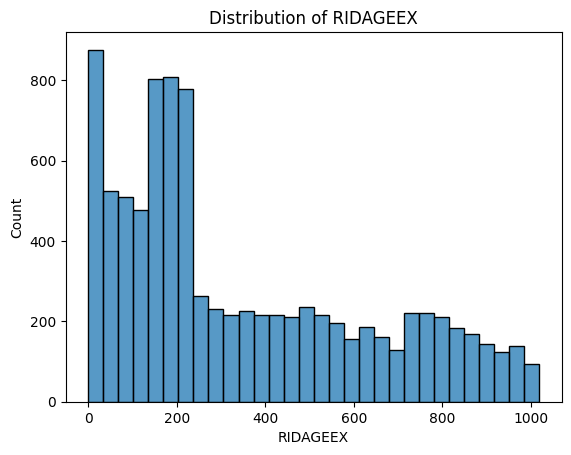

RIDAGEEX skewness: 0.7426103494034348


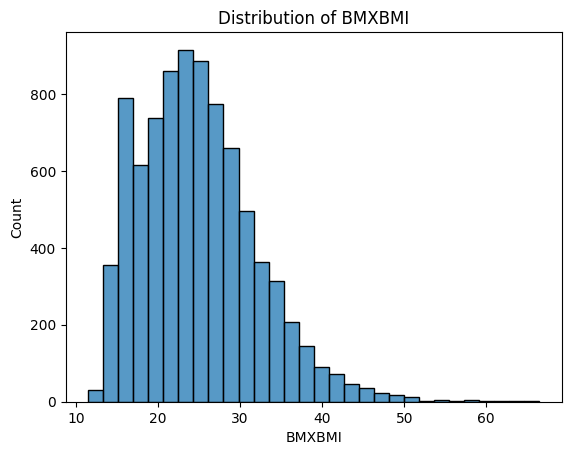

BMXBMI skewness: 0.8498248540725024


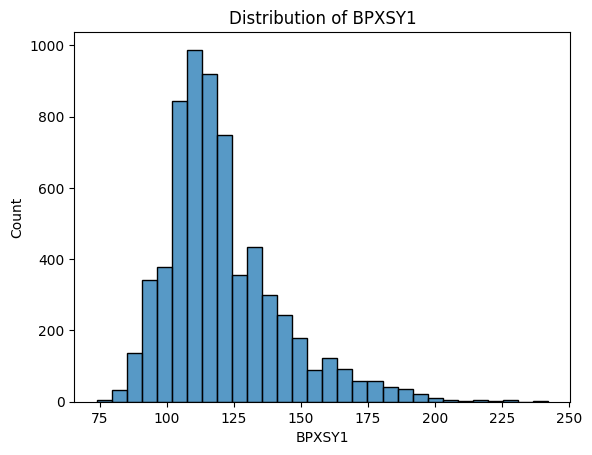

BPXSY1 skewness: 1.2660881433018687


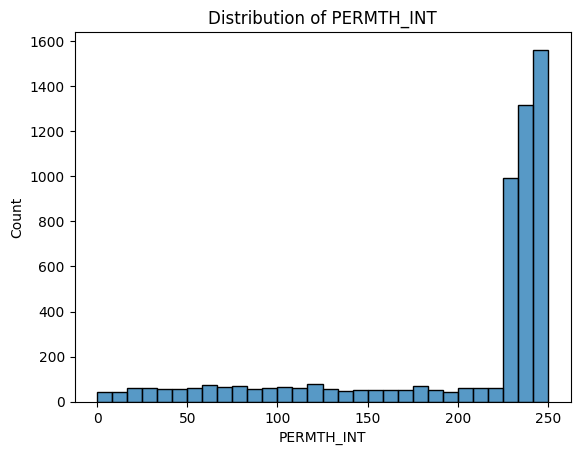

PERMTH_INT skewness: -1.602977073137749


In [ ]:
#Distribution and Skewness

import seaborn as sns
import matplotlib.pyplot as plt

cont_vars = ["RIDAGEEX", "BMXBMI", "BPXSY1", "PERMTH_INT"]

for var in cont_vars:
    plt.figure()
    sns.histplot(df[var].dropna(), bins=30)
    plt.title(f"Distribution of {var}")
    plt.show()

    print(f"{var} skewness:", df[var].skew())

The distribution of RIDAGEEX (age) is pretty uneven, slightly biomodal, and slightly right-skewed. This indicates that the data contains more middle-aged adults than elderly and may be a strong predictor of mortality.

The distribution of BMXBMI (BMI) is approximately normal, unimodal, and right-skewed. The skewness may hint at some extreme obesity outliers near a BMI score greater than 50.

The distribution of BPXSY1 (blood pressure) is also fairly normal, unimodal, and right-skewed. This also indicates possible outliers of high blood pressure.

The distribution of PERMTH_INT (survival time) is uneven with a massive spike at 220-250 months.

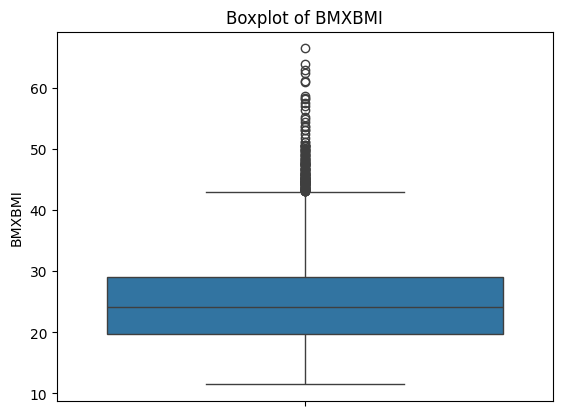

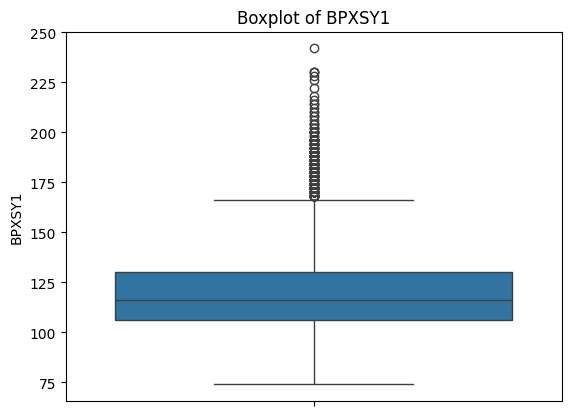

In [ ]:
# Outlier Detection

for var in ["BMXBMI", "BPXSY1"]:
    plt.figure()
    sns.boxplot(y=df[var])
    plt.title(f"Boxplot of {var}")
    plt.show()

Both the BMI and blood pressure data have many outliers. The BMI boxplot shows outliers approximately ranging from 45-70, indicating severe obesity. The blood pressure boxplot shows outliers approximately ranging from 160-250, indicating hypertension.

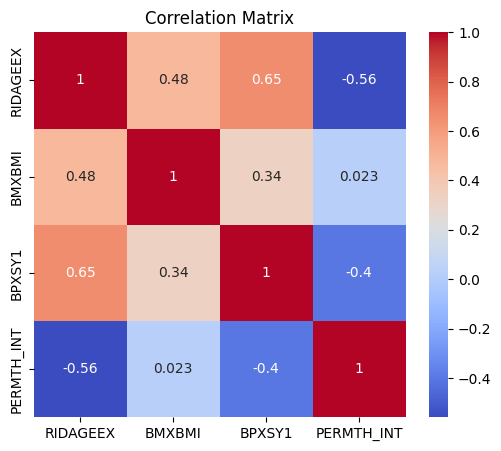

In [ ]:
# Correlation Analysis

num_vars = ["RIDAGEEX", "BMXBMI", "BPXSY1", "PERMTH_INT"]
corr = df[num_vars].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

There are no significantly strong correlations between these continuous variables because most of the correlation coefficients fall below 0.9. However, we see that there are weak negative correlations between age and survival time as well as blood pressure and survival time. These correlations make sense because, the older someone is, the less their survival time and the higher their blood pressure is, the less their survival time. Blood pressure and age also had a moderate positive correlation, where the older someone is, the higher his or her blood pressure is.

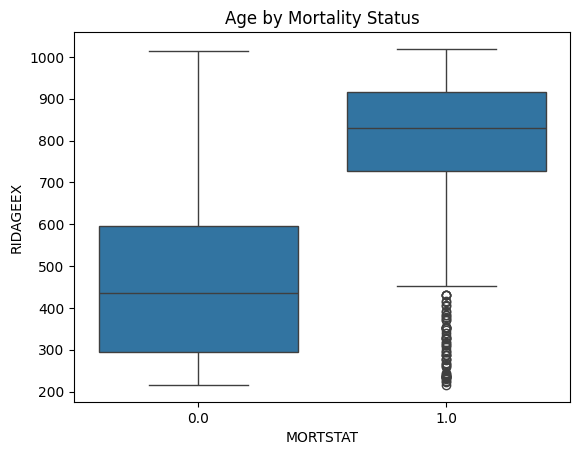

In [ ]:
# Age vs Mortality

sns.boxplot(x="MORTSTAT", y="RIDAGEEX", data=df)
plt.title("Age by Mortality Status")
plt.show()

These boxplots show that those who died (Boxplot 1.0) are significantly older.

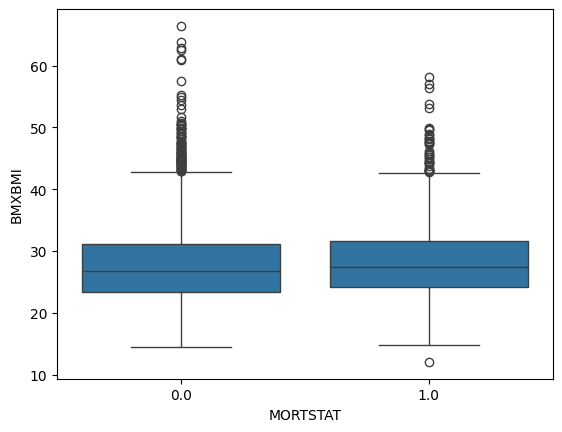

In [ ]:
# BMI vs Mortality

sns.boxplot(x="MORTSTAT", y="BMXBMI", data=df)
plt.show()

Unlike the age boxplots, there is a weaker separation between the boxplots for BMI, meaning there is less correlation between BMI and mortality rate.

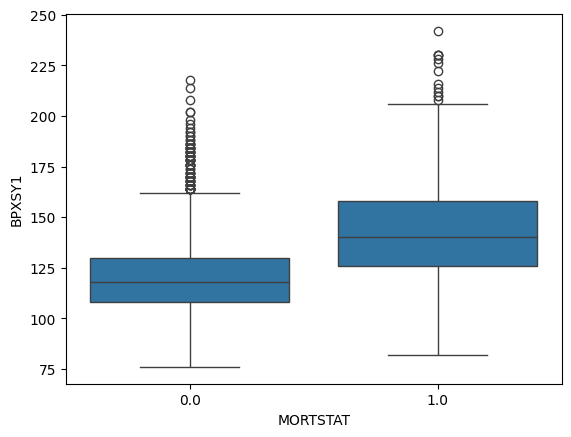

In [ ]:
# BP vs Mortality

sns.boxplot(x="MORTSTAT", y="BPXSY1", data=df)
plt.show()

These boxplots show that there was a slightly higher BP in the deceased group.

In [ ]:
# Categorical Relationships

# Smoking vs Mortality
pd.crosstab(df["SMQ020"], df["MORTSTAT"], normalize="index")

MORTSTAT,0.0,1.0
SMQ020,,
1.0,0.595995,0.404005
2.0,0.717349,0.282651
7.0,0.250000,0.750000
9.0,0.500000,0.500000


In [ ]:
# Diabetes vs Mortality
pd.crosstab(df["DIQ010"], df["MORTSTAT"], normalize="index")

MORTSTAT,0.0,1.0
DIQ010,,
1.0,0.325726,0.674274
2.0,0.732394,0.267606
3.0,0.385965,0.614035
7.0,0.000000,1.000000
9.0,0.666667,0.333333


According to NHANES documentation, 1.0 = Yes (Smoked) and 2.0 = No (Never smoked). For the row of smokers, 59.6% are alive and 40.4% died, whereas in the non-smoker row, 71.7% are alive and 28.3% died. The proportion for people who died is much greater for the group of people who smoked.


Similarly, the 1.0 means diagnosed with diabetes and 2.0 means no diabetes for the diabetes table. For the row with diabetes, 32.6% are alive and 67.4% died. For the row without diabetes, 73.2% are alive and 23.8% died. This shows that individuals with diabetes have more than double the mortality rate of those without diabetes.

Describe the data, particularly what an observation is and whether there are any missing data that might impact your analysis. Who collected the data and why? What known limitations are there to analysis?

The data after the merging has taken place represent the health and mortality conditions of various people whose data has been collected, and this combination of data by the CDC is able to shed light on key relationships and any correlations between variables of mortality (health complications, demographics, etc) and the status of mortality (relating to the rate of death). An observation correlates to a row which in tern correlates to a specific individual. There are missing data values throughout the merged table in various categories spread throughout, and this would impact analysis in data curation as many rows and fundamentally relationships may be hidden or outright missing/misrepresented if an entire row is taken out of consideration or if only a part of that row is considered, which might bias the data since that data point is not "complete". For example, if a row has demographic details missing, removing the row entirely simply reduces the pool of data avaliable (and would actually drastically reduce the amount of data in total if this was done on every row with at least one missing value) or just processing data anyway in that row could hide key demographic relationships since health conditions do not exist in a vacuum.

The CDC and the National Center for Health Statistics (NCHS) are the primary organizations responsible for collecting the data. The simple answer as to why this data was collected is to monitor the health status of many citizens to evaluate correlations and causations in the medical field. Knowing the statistics on chronic diseases such as diabetes and certain factors such as smoking could assist policy makers in making statistically and scientifically sound decisions. Furthermore, the correlation to death and mortality can further provide insight into the severity of such causes and whether such health conditions can be marked as an increased cause of death for patients. These relationships are crucial in the medical field and it is data such as these that helped define much of what we know today in mainstream medicine.

There are known limitations to analyzing this data. Firstly, the data is far from complete. Attempting to tie mortality with health conditions may seem sound in a technical, medical sense, but there are other factors that are socioeconomic that fundamentally change mortality rate in a significant way. Location, access to Health Care, and more are significant variables that are not well represented. The external validity of conclusions drawn from this data therefore are inherently limited and could struggle to be generalized. Interpretations of this data therefore must come with restraint. Due to the inherently observational nature of the data, there was no tight experiment-esc conditions performed, meaning the internal validity of the results could be altered as well since this was not performed in a perfectly isolated condition. The large number of missing data in columns is another key limitation as again this causes issues in analysis and could lead us to cut real data or lead us to adopt a biased, partial view and forego important relationships. Survivorship bias could also be a factor in a study related to mortality as data collection could be complicated and restrained if the patient is quite literally dead and it is possible that self-report dependent data points are biased, which represents another limitation. Ultimately, though the data can give interesting relationships that probably are not that far from reality, it is not perfect by any means.